# Importing Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('C:/Users/HP/Downloads/Bengaluru_House_Data.csv')

In [4]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Exploratory Data Analysis

In [7]:
for col in data.columns:
    print(data[col].value_counts())
    print("*"*30)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
******************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
******************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
******************************
2 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

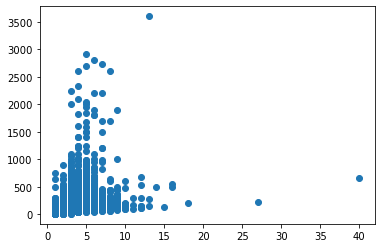

In [9]:
plt.scatter(x=data.bath, y=data.price)

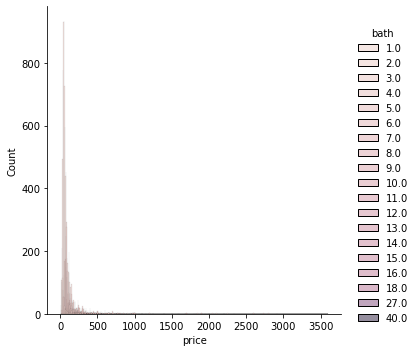

In [25]:
sns.displot(data, x="price", hue="bath")

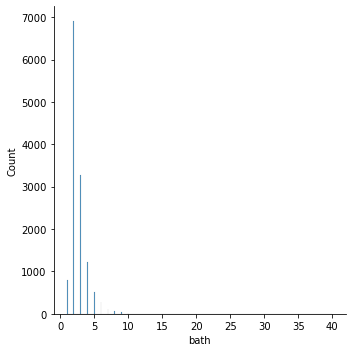

In [26]:
sns.displot(data, x="bath")

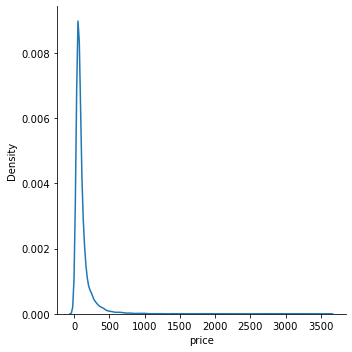

In [27]:
sns.displot(data, x="price", kind='kde')

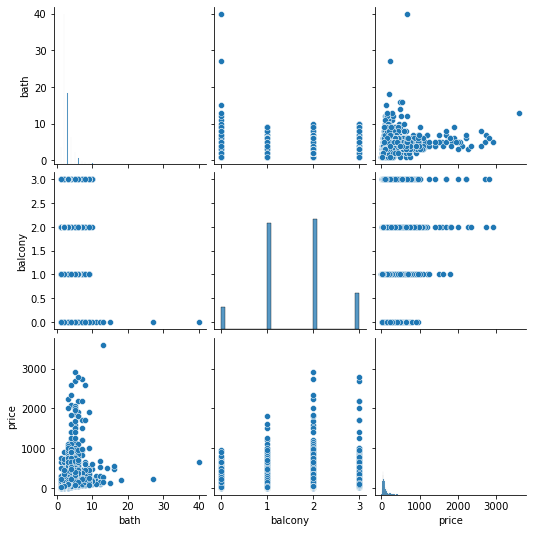

In [28]:
sns.pairplot(data)

In [30]:
corr=data.corr()

<AxesSubplot:>

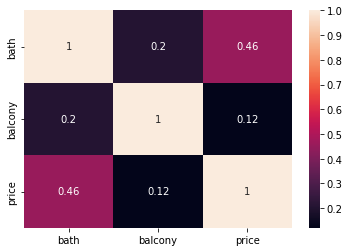

In [32]:
sns.heatmap(corr, annot=True)

In [34]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Dealing with null values

In [35]:
data.drop(columns=['availability','society','balcony','area_type'], inplace=True)

In [36]:
data['location']=data['location'].fillna('Sarjapur Road')

In [37]:
data['size']=data['size'].fillna('2 BHK')

In [38]:
data['bath']=data['bath'].fillna(data['bath'].median())

<b>Five number summary</b>

In [39]:
data.describe()

,bath,price
count,13320.000000,13320.000000
mean,2.688814,112.565627
std,1.338754,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [41]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [42]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [43]:
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


<b>Converting Ranges into Single values</b>

In [44]:
def conRange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [45]:
data['total_sqft']=data['total_sqft'].apply(conRange)

In [46]:
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

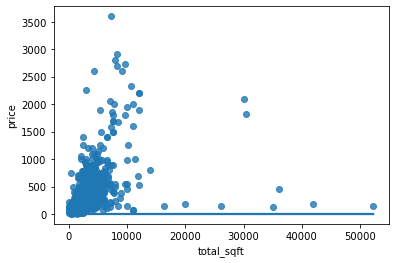

In [50]:
sns.regplot(x='total_sqft', y='price', data=data)

In [51]:
data['price_per_sqft']=data['price']*100000 /data['total_sqft']

In [52]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [53]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


# Removing Outliers

In [54]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [55]:
data.location=data['location'].apply(lambda x: x.strip())

In [56]:
location_counts=data.location.value_counts()

In [57]:
location_counts

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [58]:
location_count_small=location_counts[location_counts<=10]

In [59]:
location_count_small

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [60]:
data.location=data['location'].apply(lambda x: 'Other' if x in location_count_small else x)

In [61]:
data['location'].value_counts()

Other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [62]:
data=data[(data['total_sqft']/data['bhk']>=300)]

In [63]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [64]:
data.shape

(12530, 7)

In [65]:
def remove_outliers_sqft(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft> (m-sd)) & (subdf.price_per_sqft< (m+sd))]
        df_out=pd.concat([df_out,gen_df], ignore_index=True)
    return df_out
data=remove_outliers_sqft(data)

In [66]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [67]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for locations, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'sd': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['counts'] > 5:
                exclude_indeces= np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index_values)
            return df.drop(exclude_indices, axis='index')

In [68]:
data= bhk_outlier_remover(data)

In [69]:
data.shape

(10301, 7)

In [70]:
data.drop(columns=['size','price_per_sqft'], inplace=True)

In [71]:
data

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...
10296,Yeshwanthpur,1676.0,3.0,92.13,3
10297,Yeshwanthpur,2503.0,3.0,138.00,3
10298,Yeshwanthpur,1855.0,3.0,135.00,3
10299,Yeshwanthpur,1876.0,3.0,160.00,3


In [72]:
data.to_csv('Cleaned Data.csv')

In [73]:
corr=data.corr()

<AxesSubplot:>

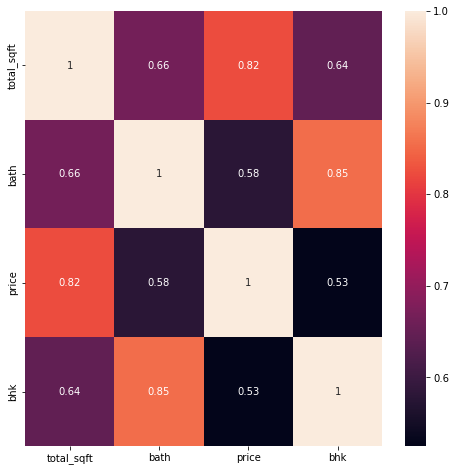

In [78]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True,ax=ax)

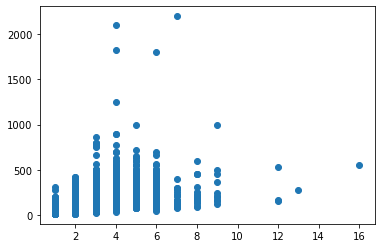

In [79]:
plt.scatter(x=data.bath, y=data.price)

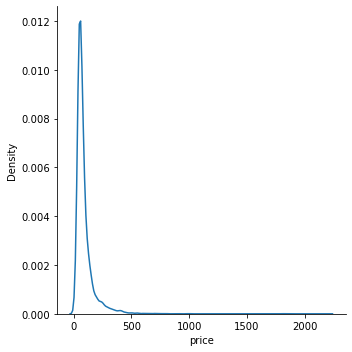

In [82]:
sns.displot(x=data.price, kind='kde')

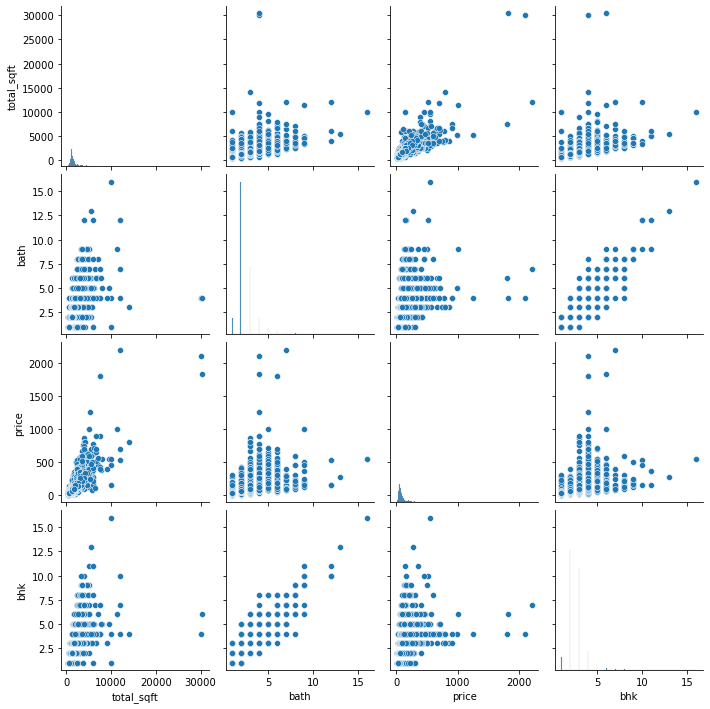

In [88]:
sns.pairplot(data)

<b>Clear correlation between BHK and number of Bathrooms</b>

<AxesSubplot:xlabel='bath', ylabel='bhk'>

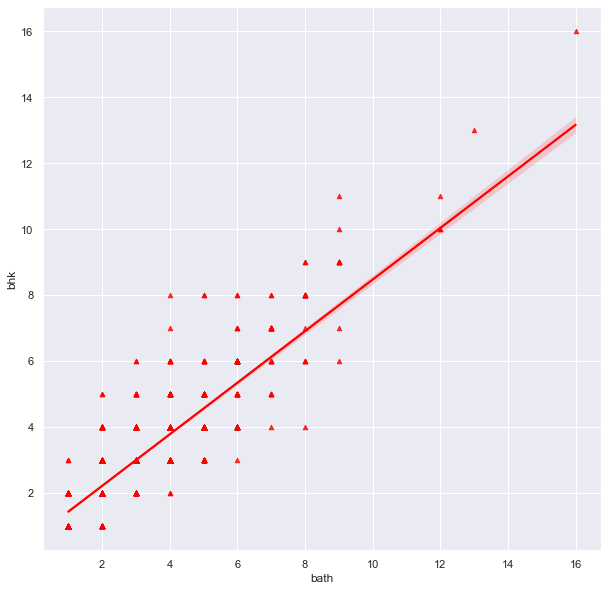

In [104]:
sns.set_theme(style="darkgrid")
fig, ax= plt.subplots(figsize=(10,10))
sns.regplot(x='bath', y='bhk', data=data, marker='^',color='red', scatter_kws={'s':20}, ax=ax)

# Training

In [57]:
x=data.drop(columns='price')

In [58]:
y=data.price

In [59]:
x

,location,total_sqft,bath,bhk
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2
...,...,...,...,...
10296,Yeshwanthpur,1676.0,3.0,3
10297,Yeshwanthpur,2503.0,3.0,3
10298,Yeshwanthpur,1855.0,3.0,3
10299,Yeshwanthpur,1876.0,3.0,3


In [60]:
y

0        428.00
1        194.00
2        235.00
3        130.00
4        148.00
          ...  
10296     92.13
10297    138.00
10298    135.00
10299    160.00
10300     92.13
Name: price, Length: 10301, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [63]:
x_train, x_test, y_train, y_test= train_test_split(x,y)

In [64]:
 print(x_train.shape)

(7725, 4)


In [65]:
print(x_test.shape)

(2576, 4)


In [66]:
from sklearn.compose import make_column_transformer
columns_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),
                                     remainder= 'passthrough')

In [67]:
scaler= StandardScaler()

In [193]:
model=RandomForestRegressor(n_estimators=100, random_state=4)

In [194]:
pipe= make_pipeline(columns_trans, scaler, model)

In [195]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=4))])

In [196]:
ypred_model=pipe.predict(x_test)

In [197]:
r2_score(y_test,ypred_model)

0.8109970737606604

In [198]:
import pickle

In [199]:
pickle.dump(pipe, open('Model.pkl','wb'))